<a href="https://colab.research.google.com/github/manojpatil3010/Bike-Sharing-Demand-_Capstone-_Project.ipynb/blob/main/ML_Regression_Capstone__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

# <b> Problem Description </b>

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# <b> Business Goal </b>

Our goal is to use and optimize Machine Learning models that effectively predict the number of ride-sharing bikes that will be used in any given 1 hour time-period, using available information.

# Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data Set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Bike Sharing Demand Prediction - Manoj Patil/SeoulBikeData.csv"

In [4]:
df=pd.read_csv(path,encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Step 1 : Statistical Inference

In [7]:
#Total Observations
print("rows: ", df.shape[0])

#Total Features
print("columns: ", df.shape[1])

rows:  8760
columns:  14


In [8]:
df.size

122640

In [9]:
#Overview of given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

- ***As we see, there are 8760 observations with 14 variables. There is no missing Values present in Dataset.***

In [10]:
#Checking for data types of features given in the dataset
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

## <b> Data Description </b>

### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# Data set Information:

- **Date** **:(string)** - Date in year-month-day format
- **Rented Bike count :(integer)** - Number of rented bikes per hour which is the target
- **Hour :(integer)** - Hour of the day 
- **Temperature(°C):(Float)**-Temperature per hour in Celsius
- **Humidity(%) :(integer)** - Humidity in the air in %
- **Wind speed (m/s) :(Float)** - Speed of the wind in m/s
- **Visibility (10m) :(integer)**- Visibility in m
- **Dew point temperature(°C):(Float)** - Temperature at the beggining of the day in Celsius
- **Solar Radiation (MJ/m2):(Float)** - Radiation comes from the Sun
- **Rainfall(mm):(Float)** - Amount of rain in mm
- **Snowfall (cm):(Float)** - Amount of snow in cm
- **Seasons :(string)** - Season of the year -Winter, Spring, Summer, Autumn
- **Holiday :(string)** - If it is holiday or No holiday
- **Functioning Day(string)**: If it is a Functioning Day 

In [11]:
#Data Description
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


- ***In the given data the dependent variable (bike count) is not distributed normally as we can clearly see that the mean (704.60) and median (504.50) are not similar.***

#  Step 2 : Exploratory Data Analysis

## <b> Data Cleaning

### Checking missing values

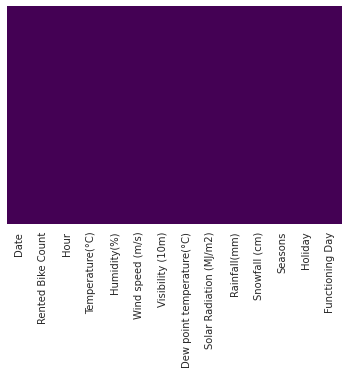

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')
plt.show()

In [13]:
#Checking for Missing Values in given dataset
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [14]:
#PairPlot for all features
# sns.pairplot(df)

In [15]:
#Changing Format for Date Variable
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")
df['Date'].head()

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
Name: Date, dtype: datetime64[ns]

In [16]:
# Creating new Columns from Date Variable to  Year , Month and Day 

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


In [18]:
# Finding Unique Values for each Variable
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
Year                            2
Month                          12
Day                            31
dtype: int64

In [19]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day'],
      dtype='object')

# <b> Data Visualization

### Checking Outliers

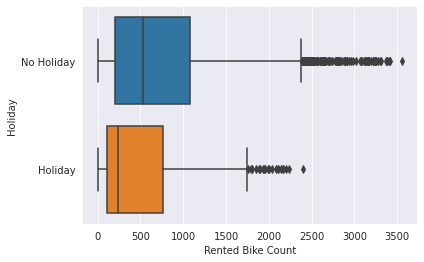

In [20]:
#Boxplot For Rented Bike Count Vs Holiday

sns.boxplot(x=df["Rented Bike Count"],y=df["Holiday"],data=df)
plt.show()

- ***We can infer from the above boxplot that, the number of bikes rented is more on working days as compared to on holidays.***

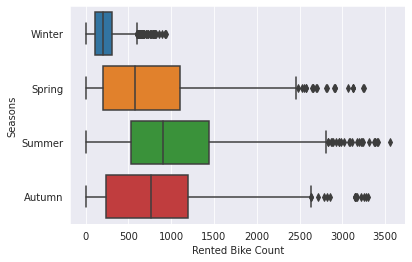

In [21]:
#Boxplot For Rented Bike Count Vs Seasons

sns.boxplot(x=df["Rented Bike Count"],y=df["Seasons"],data=df)
plt.show()

- ***We can infer from the above boxplot that,the number of Rented Bikes is more in Summer Season followed by Autumn & Spring and Winter being least of all***

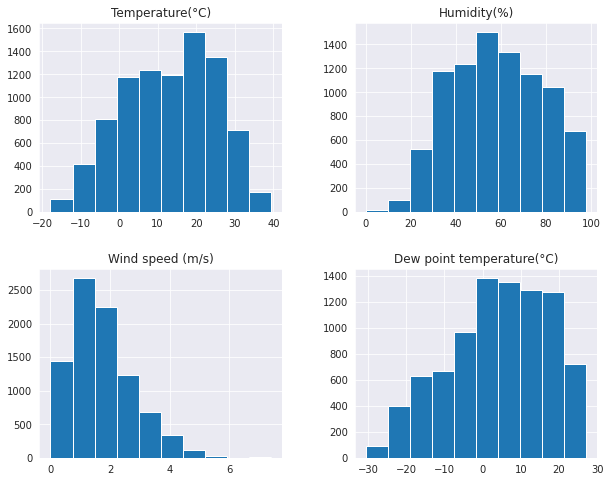

In [22]:
#Histogram for checking the distribution of data in Features 

features = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Dew point temperature(°C)']
df[features].hist(figsize=(10,8))
plt.show()

***We can infer from the above histograms that,***
- ***distribution of temperature is approximately normally distributed*** 
- ***distribution of humidity and Dew Point temperature is slightly negatively skewed*** 
- ***distribution of Wind speed is positively skewed*** 

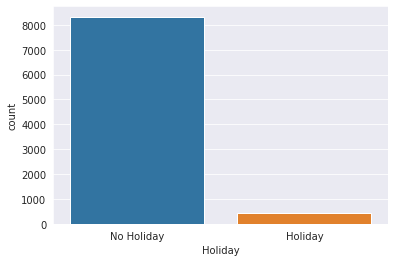

In [23]:
# Count Plot for Holiday

sns.countplot(x="Holiday", data=df)
plt.show()

- ***We can infer from the above count plot that the observations are more for working days when compared to holidays in the given dataset.*** 

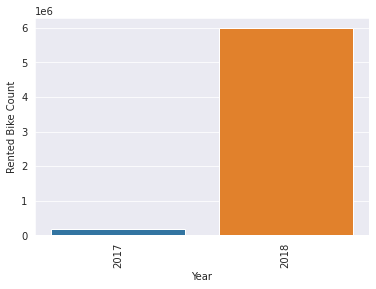

In [24]:
# Bar Plot for Year

Year = df.groupby("Year").sum().reset_index()
sns.barplot(x="Year", y="Rented Bike Count", data=Year)
plt.xticks(rotation=90)
plt.show()

In [25]:
df.shape

(8760, 17)

In [26]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

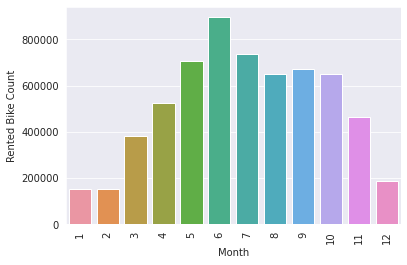

In [27]:
# Constructing Bar Plot to check bike count monthwise

Month = df.groupby("Month").sum().reset_index()
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90)

- ***In the above plot we can clearly see that the demand for rented bikes is high in the month june.***

In [28]:
df.groupby("Seasons").sum().reset_index()

,Seasons,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day
0,Autumn,1790002,25116,30839.9,129355,3264.5,3408683,12009.2,1139.65,268.1,123.0,4407312,21840,34224
1,Spring,1611909,25392,28807.1,129779,4139.1,2738725,9097.1,1520.84,403.8,0.0,4455744,8832,34968
2,Summer,2283234,25392,58694.8,143479,3553.6,3315854,41400.3,1680.85,559.7,0.0,4455744,15480,34968
3,Winter,487169,24840,-5487.4,107449,4153.0,3123332,-26820.0,644.07,70.9,534.6,4358136,11016,33552


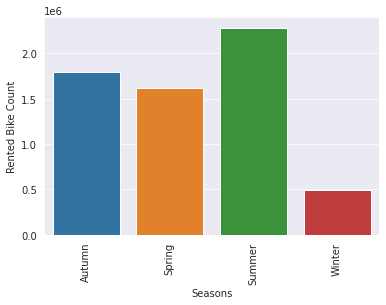

In [29]:
# Checking rented bike count seasonwise

Seasons = df.groupby("Seasons").sum().reset_index()
sns.barplot(x="Seasons", y="Rented Bike Count", data=Seasons)
plt.xticks(rotation=90)
#plt.ticklabel_format(style='plain')
plt.show()


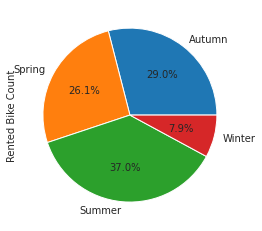

In [30]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie(autopct='%1.1f%%')
plt.show()

- ***In the above plot we can clearly observe that the people use a lot of rental bikes during summer season and demand for the same is too low during winter.***

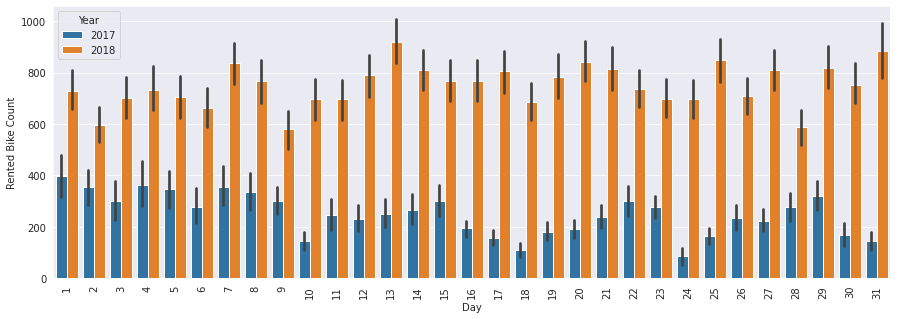

In [31]:
# Constructing the Bar plot for day vs Rented Bike Count

plt.figure(figsize=(15,5))
sns.barplot(x="Day", y="Rented Bike Count",hue="Year", data=df)
plt.xticks(rotation=90)
plt.show()

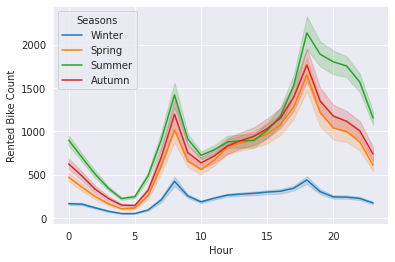

In [32]:
# Visualization on Line Plot for Hour Vs Rented Bike Count

sns.lineplot(data=df, x="Hour", y="Rented Bike Count", hue="Seasons")
plt.show()

- ***This line plot shows that there's a good demand for rental bikes at the peak hours between 07:00 AM to 09:00 AM in the morning and 05:00 PM to 07:00 PM in the evening.***

- ***Here we can see that, the demand is good when the temperature is between 20-40 degree Celsius.***

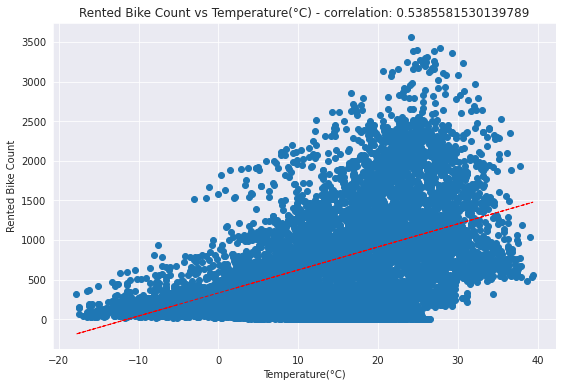

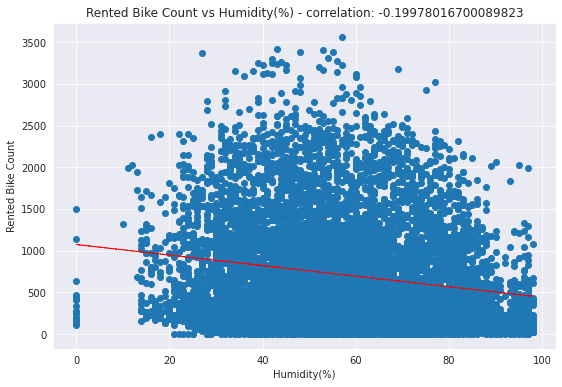

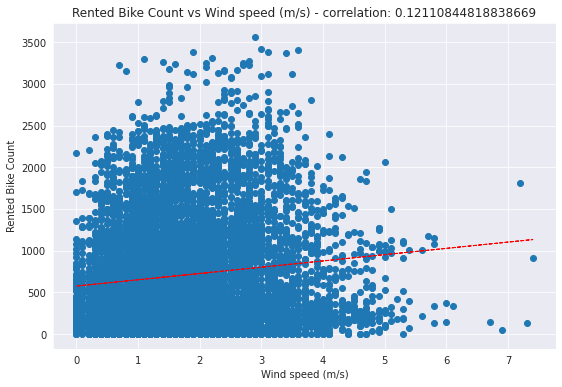

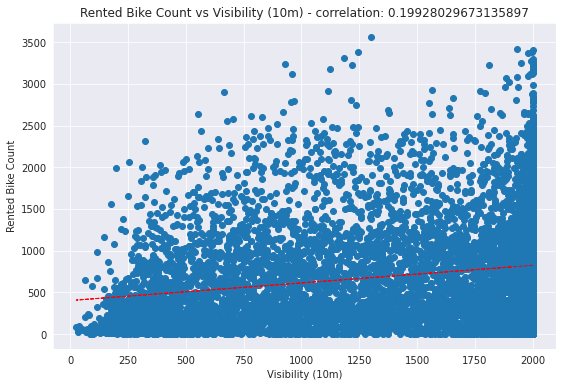

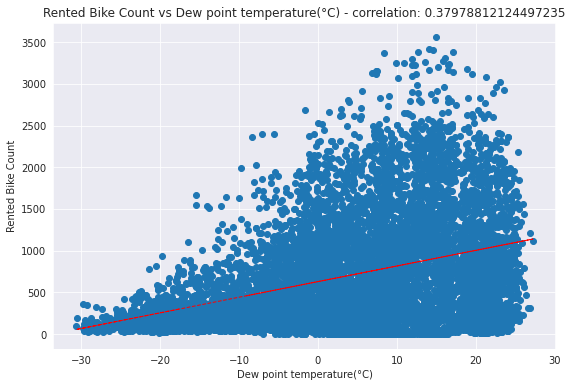

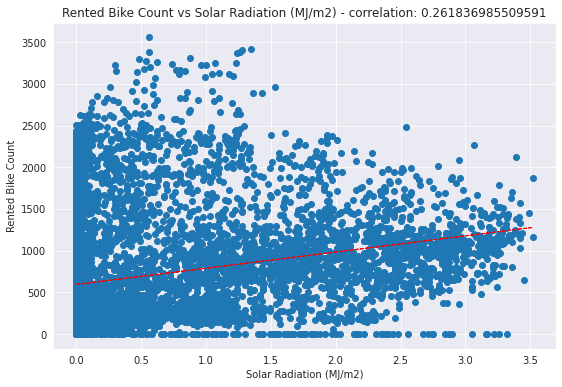

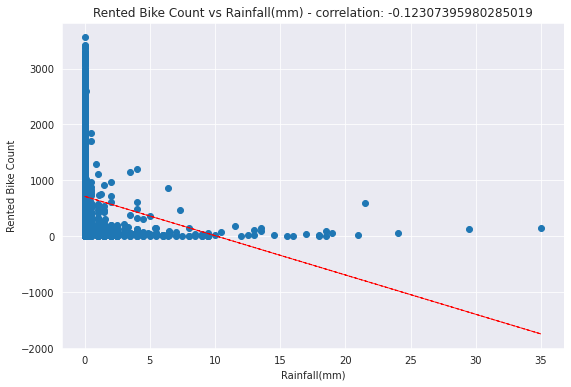

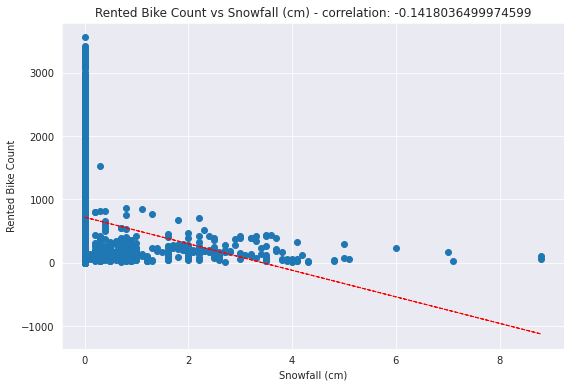

In [33]:
for col in df[['Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df["Rented Bike Count"]
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel("Rented Bike Count")
    ax.set_title('Rented Bike Count vs ' + col + ' - correlation: ' + str(correlation))
    z = np.polyfit(df[col], df["Rented Bike Count"], 1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col], y_hat, "r--", lw=1)
plt.show()

 ***We can see from above scatter plots, that***
 - ***even if it rains a lot, here for example even if we have 20 mm of rain there is a big peak of rented bikes***
 - ***When we have more than 4 cm of snow, the rented bikes demand is much lower***

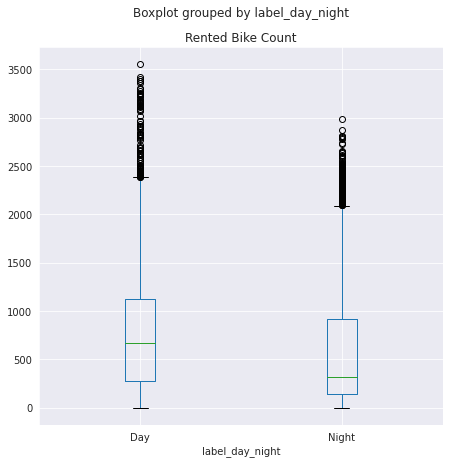

In [34]:
# Constructing Box Plot for checking the demand of rented bikes in Day and Night

df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >18 or x<6) else( 'Day'))
boxplotDay_night= df.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))

- ***Above boxplot clearly shows us that people use a lot of rental bikes during daytime when compared to night.***

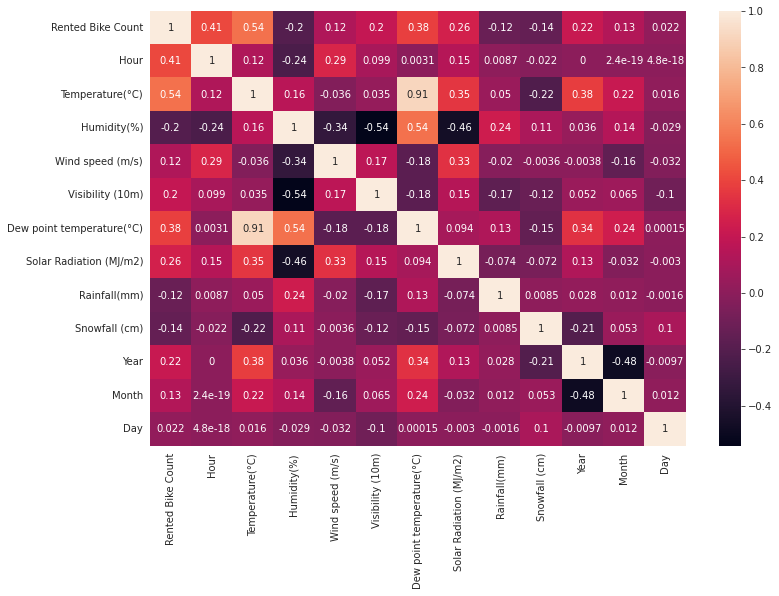

In [35]:
# Identifying correlation between variables using Heat Map

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

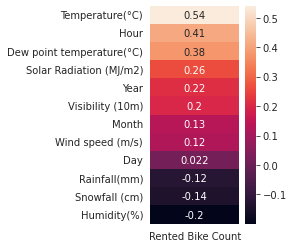

In [36]:
# Visualizing Correlation of independant variables with Target Variable

plt.figure(figsize=(2,4))
sns.heatmap(df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)
plt.show()

# Model Training:

In [37]:
# Mapping the Variables for encoding purpose

df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

# One hot encoding

df['Seasons']=pd.get_dummies(df['Seasons'])

- ***Here we are converting Categorical variables into Numerical values so that model can understand***


## Splitting into X and Y

In [38]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,label_day_night
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,2017,12,1,Night
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night


In [39]:
# Splitting the data set into X -Independant Variables and y -Target Variable

X=df.drop(['Rented Bike Count','label_day_night','Date'],axis=1)
y=df['Rented Bike Count']

In [40]:
X.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,2017,12,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,2017,12,1


# Training & Testing data set 

In [41]:
# Dividing Data set into training data and testing data 

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.1,random_state=0)

In [42]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,label_day_night
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,2017,12,1,Night
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,2017,12,1,Night


# Model Training and Evaluation

***In the given dataset, the observations for the dependent variable is continuous in nature. Regression algorithms are the sensible ones to work with this kind of data.***

## Linear Regression

In [43]:
# Model training on Linear regression algorithm
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [44]:
# Model Evaluation
print(f"MAE -: {mae(ytest, ypred)}")
print(f"MSE -: {mse(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred)}")
print(f"Adj R^2 -: {1-(1-linreg.score(xtest,ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)}")
linear_reg_accuracy=r2_score(ytest, ypred)

MAE -: 328.42337356142406
MSE -: 197729.14962130532
RMSE -: 444.6674595934644
R-Squared accuracy -: 0.5325325441531739
Adj R^2 -: 0.5243790420163106


In [61]:
linreg.coef_

array([ 2.66958979e+01,  2.30053560e+01, -9.54394696e+00,  2.03993288e+01,
        1.15464449e-02,  9.08321364e+00, -7.44737506e+01, -5.77932125e+01,
        1.21868060e+01,  1.98548790e+02, -1.50148338e+02,  9.31980287e+02,
        2.00794229e+01,  1.06244794e+00, -9.80517014e-01])

In [62]:
linreg.intercept_

-40833.14156301228

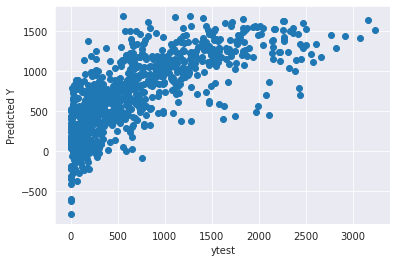

In [45]:
# Scatter Plot 
plt.scatter(ytest,ypred)
plt.xlabel('ytest')
plt.ylabel('Predicted Y')
plt.grid(True)

- ***We have applied Linear Regression Model for given data set.We get RMSE as 444 and Adjusted R square as 52 % which is not closer to 100 % .Hence this model is not the best fit for given problem statement*** 

## Decision Tree Regressor

In [46]:
# Model training on DecisionTreeRegressor algorithm
dt_reg=DecisionTreeRegressor()
dt_reg.fit(xtrain,ytrain)
ypred=dt_reg.predict(xtest)

In [47]:
# Model Evaluation
print(f"MAE -: {mae(ytest, ypred)}")
print(f"MSE -: {mse(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred)}")
print(f"Adj R^2 -: {1-(1-dt_reg.score(xtest,ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)}")

MAE -: 169.1175799086758
MSE -: 90636.92123287672
RMSE -: 301.0596639087952
R-Squared accuracy -: 0.7857179325573921
Adj R^2 -: 0.7819804546368815


### Hyper Parameter Tunning

In [48]:
# Hyper Parameter Tunning for max depth
md = range(1,15)

accuracy1 = []
for i in md:
    dt = DecisionTreeRegressor(max_depth=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy1.append(r2_score(ytest,ypred))

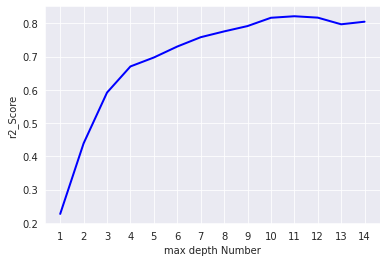

In [49]:
plt.plot(md, accuracy1, linewidth=2, color='blue')
plt.xticks(md)

plt.xlabel('max depth Number')
plt.ylabel('r2_Score')
plt.show() 

In [50]:
# Hyper Parameter Tunning for min sample leaf
ms = range(1,15)

accuracy2 = []
for i in ms:
    dt = DecisionTreeRegressor(min_samples_leaf=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy2.append(r2_score(ytest,ypred))

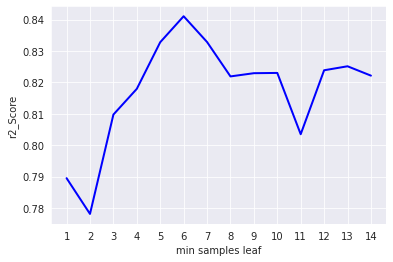

In [51]:
plt.plot(ms, accuracy2, linewidth=2, color='blue')
plt.xticks(ms)

plt.xlabel('min samples leaf')
plt.ylabel('r2_Score')
plt.show() 

In [52]:
# After observing Hyper parameter tunning, we have selected max depth =11

dt_reg1=DecisionTreeRegressor(min_samples_leaf=6,random_state=1)
dt_reg1.fit(xtrain,ytrain)
ypred=dt_reg1.predict(xtest)

# Model Evaluation
print(f"MAE -: {mae(ytest, ypred)}")
print(f"MSE -: {mse(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred)}")
print(f"Adj R^2 -: {1-(1-dt_reg1.score(xtest,ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)}")
decision_tree_accuracy=r2_score(ytest, ypred)

MAE -: 156.21345726508397
MSE -: 67230.66993157589
RMSE -: 259.2887771030129
R-Squared accuracy -: 0.8410545420946618
Adj R^2 -: 0.8382822375963128


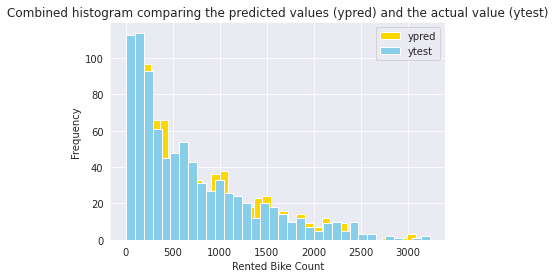

In [53]:
plt.hist(ypred, bins=34, color = "gold")
plt.hist(ytest, bins=34, color = 'skyblue')
plt.legend(["ypred", "ytest"])
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.title("Combined histogram comparing the predicted values (ypred) and the actual value (ytest)")
plt.show()

- ***We have applied Decision Tree Model for given dataset.We get RMSE as 299 less than Linear Regression and Adjusted R square as 78% which is closer to 1 as compared to linear regression .Hence this model is moderate fit for given problem statement.***

## Random Forest Regressor

In [54]:
# Model training on Random Forest Regressorr algorithm
rf_reg=RandomForestRegressor()
rf_reg.fit(xtrain,ytrain)
ypred=rf_reg.predict(xtest)

In [55]:
# Model Evaluation
print(f"MAE -: {mae(ytest, ypred)}")
print(f"MSE -: {mse(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred)}")
print(f"Adj R^2 -: {1-(1-rf_reg.score(xtest,ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)}")
random_forest_accuracy=r2_score(ytest, ypred)

MAE -: 126.92366438356163
MSE -: 45170.68192066211
RMSE -: 212.533954747617
R-Squared accuracy -: 0.8932083418314418
Adj R^2 -: 0.8913456966308274


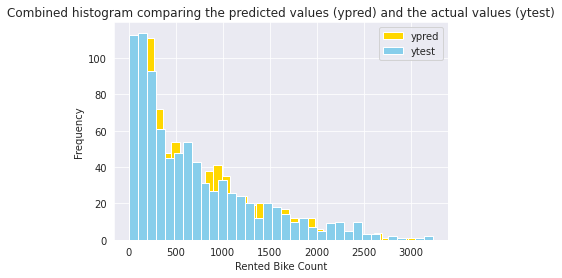

In [56]:
plt.hist(ypred, bins=34, color = "gold")
plt.hist(ytest, bins=34, color = 'skyblue')
plt.legend(["ypred", "ytest"])
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.title("Combined histogram comparing the predicted values (ypred) and the actual values (ytest)")
plt.show()


### Hyper Parameter Tunning

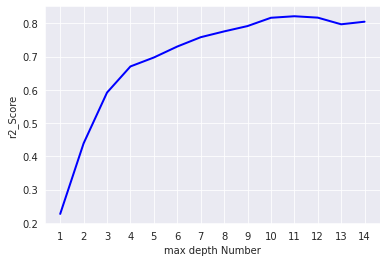

In [57]:
# Hyper Parameter Tunning for max depth
md = range(1,15)

accuracy1 = []
for i in md:
    dt = DecisionTreeRegressor(max_depth=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy1.append(r2_score(ytest,ypred))

plt.plot(md, accuracy1, linewidth=2, color='blue')
plt.xticks(md)

plt.xlabel('max depth Number')
plt.ylabel('r2_Score')
plt.show() 

- ***We have applied Random Forest Regressor for given dataset.We get RMSE as 207 less than Decision Tree and Adjusted R square as 89% which is closer to 1 as compared to Decision Tree .Hence this model is good fit for given problem statement*** 

## Comparision between Machine Learning Models

In [58]:
# Accuracy of given models
models = ["Linear Regression","Decision Tree regressor","Random Forest Regressor"]
accuracy = [linear_reg_accuracy,decision_tree_accuracy,random_forest_accuracy]
for i in range(0,len(accuracy)):
    accuracy[i]=np.round(accuracy[i]*100,decimals=3)
print(accuracy)

[53.253, 84.105, 89.321]


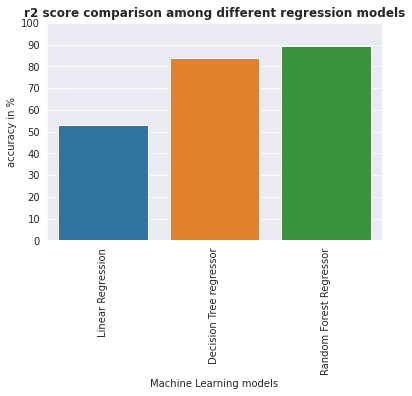

In [59]:
# Bar plot to compare r2 score of different models 
compare = sns.barplot(x=models,y=accuracy)
plt.yticks(np.arange(0,101,10))
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("Machine Learning models")
plt.ylabel("accuracy in %")
plt.title('r2 score comparison among different regression models',fontweight='bold')
plt.show()

- ***After a detailed comparison of how our models are working, we can see that Random forest is producing better results when compared to the other ones for the given dataset.*** 

# Conclusion

This study shows that the Bike rental is influenced by a lot of features. In this study, we understood that a lot of Koreans rent bikes during the weekdays, so we guessed that the fundamental use is by either students and working professionals to follow the usual schedule. There are additionally many conditions which add to the variety of the quantity of rents like the day of the week, the time of the day and climate conditions. What's more as we expected more individuals are set to rent bikes when the climate is great.
After Analyzing the above model, the organization should focus on the following features: Talking about season wise, the company should be focusing more during winter and looking at month wise data, it seems that the organization should be pumping their business in the months of December, January and February. We can also see that people don't  prefer renting bikes during the days with low temperature and high rainfall, and we can use this time for bike maintenance. 
